In [7]:
pip install datasets

In [8]:
pip install transformers

In [9]:
pip install prompting

In [10]:
pip install openprompt

**Zero-Shot Learning and Multilingual Evaluation**

In [ ]:
#Importing the necessary packages
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification
import tensorflow as tf
from transformers import BertTokenizer
import torch
from torch.utils.data import TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, Dense
from keras.models import Model
from transformers import AutoTokenizer, FlaubertWithLMHeadModel

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
!pip install sacremoses
!pip install openprompt
!pip install openprompt
from openprompt.prompts import ManualTemplate
from openprompt.plms import load_plm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [ ]:
df1=pd.read_csv('/content/DYNABENCH.csv')
df1.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.isnull().sum()

Unnamed: 0            0
acl.id                0
X1                    0
text                  0
label                 0
type                  0
target                8
level                 0
split                 0
round.base            0
annotator             0
round                 0
acl.id.matched    11046
dtype: int64

In [ ]:
df1.shape

(41144, 13)

**1. Data Pre-processing**

In [ ]:
#Data Cleaning
def remove_punctuations_and_brackets(text):
    punctuation_and_brackets = set(string.punctuation + '()[]{}<>@?1234567890')
    cleaned_text = ''.join(char for char in text if char not in punctuation_and_brackets)
    #make the text lower case
    cleaned_text =cleaned_text.lower()
    return cleaned_text
df1['text']=df1['text'].apply(remove_punctuations_and_brackets)
df1.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,im not saying we should actually eliminate hee...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
#stopwords removal
stopwords= stopwords.words('english')
def stopwords_removal(text):
    words = text.split()
    cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])
    return cleaned_text
df1['text']=df1['text'].apply(stopwords_removal)
df1.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people burden society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,arabs welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,im saying actually eliminate heebs wish natura...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
# Function to remove words with length less than 3
def remove_short_words(input_text):
    words = word_tokenize(input_text)
    filtered_words = [word for word in words if len(word) >= 3]
    return ' '.join(filtered_words)

# Apply the remove_short_words function to the 'text' column
df1['text'] = df1['text'].apply(remove_short_words)
df1.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people burden society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,arabs welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
df1['label'] = df1['label'].replace({'hate': 1, 'nothate': 0})
X= df1['text']
y=df1['label']
df1.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits lowlives,1,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people burden society,1,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,arabs welcome,1,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,saying actually eliminate heebs wish naturally...,1,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas black people,1,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
df1['label'].value_counts()

1    22175
0    18969
Name: label, dtype: int64

**2. DYNABENCH Dataset**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
bert = TFBertModel.from_pretrained('bert-base-uncased')
Length = 100
def get_model():
    input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')
    embeddings = bert([input_ids, input_mask])[1]
    out = Dropout(0.2)(embeddings)
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)
    y = Dense(1,activation = 'sigmoid')(out)
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
    optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model
model = get_model()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from keras.callbacks import EarlyStopping
history = model.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.3,
                    batch_size = 32,
                    callbacks=[EarlyStopping( monitor='val_accuracy',
                                             mode='max',
                                             patience=3,
                                             verbose=False,
                                             restore_best_weights=True)])

Epoch 1/5
630/630 [==============================] - 482s 699ms/step - loss: 0.6141 - accuracy: 0.6536 - val_loss: 0.5238 - val_accuracy: 0.7368
Epoch 2/5
630/630 [==============================] - 463s 736ms/step - loss: 0.4914 - accuracy: 0.7561 - val_loss: 0.4935 - val_accuracy: 0.7463
Epoch 3/5
630/630 [==============================] - 463s 736ms/step - loss: 0.4155 - accuracy: 0.7993 - val_loss: 0.5057 - val_accuracy: 0.7612
Epoch 4/5
630/630 [==============================] - 463s 735ms/step - loss: 0.3484 - accuracy: 0.8384 - val_loss: 0.5261 - val_accuracy: 0.7545
Epoch 5/5
630/630 [==============================] - 435s 691ms/step - loss: 0.2861 - accuracy: 0.8698 - val_loss: 0.5866 - val_accuracy: 0.7469


In [ ]:
predicted_lbl = np.where(model.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy on DYNABENCH: ",accuracy)

386/386 [==============================] - 87s 217ms/step
Accuracy on DYNABENCH:  0.7448152948801037


**3. DAVIDSON Dataset**

In [ ]:
df2=pd.read_csv('/content/DAVIDSON.csv')
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
from nltk.corpus import stopwords
stopwords= stopwords.words('english')

df2['tweet']=df2['tweet'].apply(remove_punctuations_and_brackets)

df2['tweet']=df2['tweet'].apply(stopwords_removal)

df2['tweet'] = df2['tweet'].apply(remove_short_words)
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,mayasolovely woman shouldnt complain cleaning ...
1,1,3,0,3,0,1,mleew boy dats coldtyga dwn bad cuffin dat hoe...
2,2,3,0,3,0,1,urkindofbrand dawg sbabylife ever fuck bitch s...
3,3,3,0,2,1,1,cganderson vivabased look like tranny
4,4,6,0,6,0,1,shenikaroberts shit hear might true might fake...


In [ ]:
X= df2['tweet']
y=df2['class']
df2.drop(df2[df2['class'] == 2].index, inplace=True)
df2.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
1,1,3,0,3,0,1,mleew boy dats coldtyga dwn bad cuffin dat hoe...
2,2,3,0,3,0,1,urkindofbrand dawg sbabylife ever fuck bitch s...
3,3,3,0,2,1,1,cganderson vivabased look like tranny
4,4,6,0,6,0,1,shenikaroberts shit hear might true might fake...
5,5,3,1,2,0,1,tmadisonx shit blows meclaim faithful somebody...


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
Davmodel = get_model()
history = Davmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.3,
                    batch_size = 32)

Epoch 1/5
380/380 [==============================] - 321s 721ms/step - loss: -2.4185 - accuracy: 0.7709 - val_loss: -4.8788 - val_accuracy: 0.7643
Epoch 2/5
380/380 [==============================] - 268s 705ms/step - loss: -6.0081 - accuracy: 0.7794 - val_loss: -7.9170 - val_accuracy: 0.7633
Epoch 3/5
380/380 [==============================] - 273s 720ms/step - loss: -8.7494 - accuracy: 0.7795 - val_loss: -10.7435 - val_accuracy: 0.7639
Epoch 4/5
380/380 [==============================] - 272s 717ms/step - loss: -11.4502 - accuracy: 0.7824 - val_loss: -13.2273 - val_accuracy: 0.7645
Epoch 5/5
380/380 [==============================] - 272s 717ms/step - loss: -14.1177 - accuracy: 0.7846 - val_loss: -15.5407 - val_accuracy: 0.7668


In [ ]:
predicted_lbl = np.where(Davmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy on DAVIDSON: ",accuracy)

233/233 [==============================] - 50s 216ms/step
Accuracy on DAVIDSON:  0.7720242098184263


**4. GHC Data set**

In [ ]:
df3=pd.read_csv('/content/GHC.tsv',sep='\t')
df3.head()

,ID,Annotator,Text,Hate,HD,CV,VO,REL,RAE,SXO,GEN,IDL,NAT,POL,MPH,EX,IM
0,27044,4,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27044,15,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27044,10,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27044,8,Ah the PSYOPS antifa crew is back. That’s how ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27045,4,Get the new Android app update released today ...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from nltk.corpus import stopwords
stopwords= stopwords.words('english')
def stopwords_removal(text):
    words = text.split()
    cleaned_text = ' '.join([word for word in words if word.lower() not in stopwords])
    return cleaned_text

df3['Text']=df3['Text'].apply(remove_punctuations_and_brackets)

df3['Text'] = df3['Text'].apply(remove_short_words)

df3['Text']=df3['Text'].apply(stopwords_removal)
df3.head()

,ID,Annotator,Text,Hate,HD,CV,VO,REL,RAE,SXO,GEN,IDL,NAT,POL,MPH,EX,IM
0,27044,4,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27044,15,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27044,10,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27044,8,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27045,4,get new android app update released today http...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X= df3['Text']
y=df3['Hate']
df3.head()

,ID,Annotator,Text,Hate,HD,CV,VO,REL,RAE,SXO,GEN,IDL,NAT,POL,MPH,EX,IM
0,27044,4,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27044,15,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27044,10,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27044,8,psyops antifa crew back know winning,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27045,4,get new android app update released today http...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
GHCmodel = get_model()
history = GHCmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.3,
                    batch_size = 32)

Epoch 1/5
1325/1325 [==============================] - 1053s 738ms/step - loss: 0.3596 - accuracy: 0.8678 - val_loss: 0.3308 - val_accuracy: 0.8711
Epoch 2/5
1325/1325 [==============================] - 961s 726ms/step - loss: 0.3039 - accuracy: 0.8779 - val_loss: 0.3123 - val_accuracy: 0.8750
Epoch 3/5
1325/1325 [==============================] - 960s 724ms/step - loss: 0.2757 - accuracy: 0.8858 - val_loss: 0.3291 - val_accuracy: 0.8659
Epoch 4/5
1325/1325 [==============================] - 941s 710ms/step - loss: 0.2463 - accuracy: 0.8923 - val_loss: 0.3638 - val_accuracy: 0.8687
Epoch 5/5
1325/1325 [==============================] - 960s 725ms/step - loss: 0.2235 - accuracy: 0.8996 - val_loss: 0.4368 - val_accuracy: 0.8692


In [ ]:
predicted_lbl = np.where(GHCmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,0,1)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy on GHC: ",accuracy)

812/812 [==============================] - 176s 217ms/step
Accuracy on GHC:  0.8618590854809507


**5. HATEVAL Data set**

In [ ]:
df4=pd.read_csv('/content/HATEVAL.tsv',sep='\t')
df4.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [ ]:
from nltk.corpus import stopwords
stopwords= stopwords.words('english')

df4['text']=df4['text'].apply(remove_punctuations_and_brackets)

df4['text'] = df4['text'].apply(remove_short_words)

df4['text']=df4['text'].apply(stopwords_removal)
df4.head()

,id,text,HS,TR,AG
0,201,hurray saving many ways potus realdonaldtrump ...,1,0,0
1,202,would young fighting age men vast majority one...,1,0,0
2,203,kamalaharris illegals dump kids border like ro...,1,0,0
3,204,times nearly white states pose array problems ...,0,0,0
4,205,orban brussels european leaders ignoring peopl...,0,0,0


In [ ]:
X= df4['text']
y=df4['HS']
df4.head()

,id,text,HS,TR,AG
0,201,hurray saving many ways potus realdonaldtrump ...,1,0,0
1,202,would young fighting age men vast majority one...,1,0,0
2,203,kamalaharris illegals dump kids border like ro...,1,0,0
3,204,times nearly white states pose array problems ...,0,0,0
4,205,orban brussels european leaders ignoring peopl...,0,0,0


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
HATmodel = get_model()
history = HATmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.3,
                    batch_size = 32)

Epoch 1/5
154/154 [==============================] - 189s 859ms/step - loss: 0.6466 - accuracy: 0.6257 - val_loss: 0.6334 - val_accuracy: 0.6848
Epoch 2/5
154/154 [==============================] - 127s 829ms/step - loss: 0.5642 - accuracy: 0.7159 - val_loss: 0.5478 - val_accuracy: 0.7348
Epoch 3/5
154/154 [==============================] - 122s 794ms/step - loss: 0.4857 - accuracy: 0.7718 - val_loss: 0.6022 - val_accuracy: 0.7362
Epoch 4/5
154/154 [==============================] - 122s 791ms/step - loss: 0.4388 - accuracy: 0.8016 - val_loss: 0.7299 - val_accuracy: 0.7310
Epoch 5/5
154/154 [==============================] - 122s 791ms/step - loss: 0.3790 - accuracy: 0.8398 - val_loss: 0.6632 - val_accuracy: 0.6981


In [ ]:
predicted_lbl = np.where(HATmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,0,1)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy on HATEVAL: ",accuracy)

94/94 [==============================] - 21s 221ms/step
Accuracy on MLMA:  0.784


**Evaluating Robustness of Our Model after training it upto HATEVAL dataset(i.e Dynabench, Davidson, GHC, HATEVAL) and by testing it with MLMA Data set which is not preprocessed(i.e it contains special characters, spelling mistakes, stop words, punctuations and so on)**

In [ ]:
df5=pd.read_csv('/content/MLMA.csv')
df5 = df5[df5['sentiment'].isin(['offensive', 'normal'])]
df5['sentiment'] = df5['sentiment'].replace({'offensive': 1, 'normal': 0})
X= df5['tweet']
y=df5['sentiment']

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
X_tokens =tokenizer(X.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

predicted_lbl = np.where(HATmodel.predict({'input_ids':X_tokens['input_ids'],'input_mask':X_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y, predicted_lbl)
print("Accuracy: ",accuracy)

113/113 [==============================] - 30s 238ms/step
Accuracy:  0.6840940525587829


**6. MLMA Data set**

In [ ]:
df5=pd.read_csv('/content/MLMA.csv')
df5.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,call sis im boy girl still faggot shut,offensive,indirect,confusion_disgust,origin,gay
1,2,@user @user legit nilas retarded idk,offensive_disrespectful,indirect,anger_confusion,disability,special_needs
2,3,said retard @url,fearful_abusive_offensive_hateful,indirect,confusion_disgust,disability,special_needs
3,4,america another 8 years obama's ideology via h...,fearful_abusive_hateful_disrespectful_normal,indirect,anger_fear_shock_sadness_disgust,origin,other
4,5,@user don... fucking made cry twat.,offensive,indirect,shock_disgust,gender,women


Previously for evaluating robustness we did not preprocess the data. Here data preprocessing is being done.

In [ ]:
from nltk.corpus import stopwords
stopwords= stopwords.words('english')

df5['tweet']=df5['tweet'].apply(remove_punctuations_and_brackets)

df5['tweet'] = df5['tweet'].apply(remove_short_words)

df5['tweet']=df5['tweet'].apply(stopwords_removal)
df5 = df5[df5['sentiment'].isin(['offensive', 'normal'])]
df5['sentiment'] = df5['sentiment'].replace({'offensive': 1, 'normal': 0})

df5.head()

<ipython-input-31-f7796b8a0062>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['sentiment'] = df5['sentiment'].replace({'offensive': 1, 'normal': 0})


,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,call sis boy girl still faggot shut,1,indirect,confusion_disgust,origin,gay
4,5,user fucking made cry twat,1,indirect,shock_disgust,gender,women
5,6,one wants negro swan,1,indirect,anger_sadness,origin,left_wing_people
6,7,user user user hahaha one trumps shithole coun...,1,indirect,confusion_sadness_indifference_disgust,origin,other
7,8,juul faggot,1,indirect,confusion_fear_indifference_sadness_disgust,sexual_orientation,other


In [ ]:
X= df5['tweet']
y=df5['sentiment']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
MLMAmodel = get_model()
history = MLMAmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.3,
                    batch_size = 32)

Epoch 1/5
56/56 [==============================] - 86s 795ms/step - loss: 0.5085 - accuracy: 0.8041 - val_loss: 0.4842 - val_accuracy: 0.8142
Epoch 2/5
56/56 [==============================] - 50s 897ms/step - loss: 0.4741 - accuracy: 0.8165 - val_loss: 0.4685 - val_accuracy: 0.8142
Epoch 3/5
56/56 [==============================] - 48s 854ms/step - loss: 0.4698 - accuracy: 0.8165 - val_loss: 0.4719 - val_accuracy: 0.8142
Epoch 4/5
56/56 [==============================] - 47s 846ms/step - loss: 0.4565 - accuracy: 0.8159 - val_loss: 0.4976 - val_accuracy: 0.8142
Epoch 5/5
56/56 [==============================] - 47s 837ms/step - loss: 0.4319 - accuracy: 0.8193 - val_loss: 0.4957 - val_accuracy: 0.8063


**Error Analysis**

In [ ]:
predicted_lbl = np.where(MLMAmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy on MLMA: ",accuracy)

34/34 [==============================] - 8s 216ms/step
Accuracy on MLMA:  0.8055299539170507


In [ ]:
eval_results = MLMAmodel.evaluate(x={'input_ids': X_test_tokens['input_ids'],
                                   'input_mask': X_test_tokens['attention_mask']},
                                 y=y_test)
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])

34/34 [==============================] - 8s 225ms/step - loss: 0.4855 - accuracy: 0.8055
Test Loss: 0.48550620675086975
Test Accuracy: 0.8055299520492554


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predicted_lbl)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  6 189]
 [ 22 868]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, predicted_lbl))

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.03      0.05       195
           1       0.82      0.98      0.89       890

    accuracy                           0.81      1085
   macro avg       0.52      0.50      0.47      1085
weighted avg       0.71      0.81      0.74      1085



In [ ]:
MLMAmodel.save('mlmamodel')

**7. HATEXPLAIN**

In [ ]:
df7=pd.read_csv('/content/HATEXPLAIN.csv')
df7.head()

,post_id,annotators,rationales,post_tokens
0,1179055004553900032_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],"['i', 'dont', 'think', 'im', 'getting', 'my', ..."
1,1179063826874032128_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],"['we', 'cannot', 'continue', 'calling', 'ourse..."
2,1178793830532956161_twitter,"[{'label': 'normal', 'annotator_id': 4, 'targe...",[],"['nawt', 'yall', 'niggers', 'ignoring', 'me']"
3,1179088797964763136_twitter,"[{'label': 'hatespeech', 'annotator_id': 1, 't...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['<user>', 'i', 'am', 'bit', 'confused', 'coz'..."
4,1179085312976445440_twitter,"[{'label': 'hatespeech', 'annotator_id': 4, 't...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['this', 'bitch', 'in', 'whataburger', 'eating..."


In [ ]:
import json
df7['label'] = df7['annotators'].apply(lambda x: json.loads(x.replace("'", "\""))[0]['label'] if pd.notnull(x) else None)
df7.drop(df7[df7['label'] == 'offensive'].index, inplace=True)
df7['label'] = df7['label'].replace({'hatespeech': 1, 'normal': 0})
df7.head()

,post_id,annotators,rationales,post_tokens,label
0,1179055004553900032_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],"['i', 'dont', 'think', 'im', 'getting', 'my', ...",0
1,1179063826874032128_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],"['we', 'cannot', 'continue', 'calling', 'ourse...",0
2,1178793830532956161_twitter,"[{'label': 'normal', 'annotator_id': 4, 'targe...",[],"['nawt', 'yall', 'niggers', 'ignoring', 'me']",0
3,1179088797964763136_twitter,"[{'label': 'hatespeech', 'annotator_id': 1, 't...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['<user>', 'i', 'am', 'bit', 'confused', 'coz'...",1
4,1179085312976445440_twitter,"[{'label': 'hatespeech', 'annotator_id': 4, 't...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","['this', 'bitch', 'in', 'whataburger', 'eating...",1


In [ ]:
from nltk.corpus import stopwords
stopwords= stopwords.words('english')

df7['post_tokens']=df7['post_tokens'].apply(remove_punctuations_and_brackets)

df7['post_tokens'] = df7['post_tokens'].apply(remove_short_words)

df7['post_tokens']=df7['post_tokens'].apply(stopwords_removal)
df7.head()

,post_id,annotators,rationales,post_tokens,label
0,1179055004553900032_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],dont think getting baby white two white nikes ...,0
1,1179063826874032128_twitter,"[{'label': 'normal', 'annotator_id': 1, 'targe...",[],continue calling feminists rights womxn arent ...,0
2,1178793830532956161_twitter,"[{'label': 'normal', 'annotator_id': 4, 'targe...",[],nawt yall niggers ignoring,0
3,1179088797964763136_twitter,"[{'label': 'hatespeech', 'annotator_id': 1, 't...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",user bit confused coz chinese ppl access twitt...,1
4,1179085312976445440_twitter,"[{'label': 'hatespeech', 'annotator_id': 4, 't...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",bitch whataburger eating burger top bun holdin...,1


In [ ]:
X= df7['post_tokens']
y=df7['label']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
HATEXmodel = get_model()
history = HATEXmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.3,
                    batch_size = 32)

Epoch 1/5
218/218 [==============================] - 207s 727ms/step - loss: 0.5288 - accuracy: 0.7463 - val_loss: 0.4379 - val_accuracy: 0.8246
Epoch 2/5
218/218 [==============================] - 155s 712ms/step - loss: 0.4120 - accuracy: 0.8252 - val_loss: 0.4180 - val_accuracy: 0.8300
Epoch 3/5
218/218 [==============================] - 154s 708ms/step - loss: 0.3452 - accuracy: 0.8632 - val_loss: 0.4099 - val_accuracy: 0.8313
Epoch 4/5
218/218 [==============================] - 155s 711ms/step - loss: 0.2814 - accuracy: 0.8941 - val_loss: 0.4490 - val_accuracy: 0.8213
Epoch 5/5
218/218 [==============================] - 155s 710ms/step - loss: 0.2165 - accuracy: 0.9179 - val_loss: 0.5320 - val_accuracy: 0.8266


In [ ]:
predicted_lbl = np.where(HATEXmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy on HATEXPLAIN: ",accuracy)

134/134 [==============================] - 32s 214ms/step
Accuracy on HATEXPLAIN:  0.8316901408450704


**Multilingual and Zero Shot Evaluation of HATEXPLAIN Model using MLMA_FR Data set. Testing Multilinguality of our model by giving the french dataset to the trained HATEXPLAIN model(i.e our model is trained with all of our english datasets). Here Robustness is also being tested as the french dataset given contains lot of noise( special characters, punctuations, stop words and so on)**

In [ ]:
df8=pd.read_csv('/content/MLMA_FR.csv')
df8.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,rt @user personnage ainsi q tte la clique gauc...,abusive,direct,shock,origin,other
1,2,@user @user @user bah oui t'as raison l'autre ...,offensive,indirect,shock,other,individual
2,3,moi j'ai personne à qui m'adresser pour réclam...,hateful,direct,anger_confusion_sadness_fear_disgust,other,women
3,4,@user @user c...est vrai que les anchois sont ...,normal,indirect,indifference,other,other
4,5,eh les renois faut se réveiller la @url,normal,direct,sadness,origin,african_descent


In [ ]:
df8 = df8[df8['sentiment'].isin(['offensive', 'normal'])]
df8['sentiment'] = df8['sentiment'].replace({'offensive': 1, 'normal': 0})

<ipython-input-115-025663429d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['sentiment'] = df8['sentiment'].replace({'offensive': 1, 'normal': 0})


In [ ]:
X= df8['tweet']
y=df8['sentiment']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
predicted_lbl = np.where(HATEXmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,0,1)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy of MLMA_FR on HATEXPLAIN Trained Model: ",accuracy)

21/21 [==============================] - 4s 201ms/step
Accuracy on of MLMA_FR on HATEXPLAIN Trained Model:  0.6033950617283951


**9. MultilingualBert Model**

In [ ]:
df8=pd.read_csv('/content/MLMA_FR.csv')
df8 = df8[df8['sentiment'].isin(['offensive', 'normal'])]
df8['sentiment'] = df8['sentiment'].replace({'offensive': 1, 'normal': 0})

X= df8['tweet']
y=df8['sentiment']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1, shuffle=True)

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

In [ ]:
bert = TFBertModel.from_pretrained("bert-base-multilingual-cased")
Length = 100
def get_model():
    input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')
    embeddings = bert([input_ids, input_mask])[1]
    out = Dropout(0.2)(embeddings)
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)
    y = Dense(1,activation = 'sigmoid')(out)
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
    optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model
MBmodel = get_model()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
history = MBmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=10,
                    validation_split = 0.1,
                    batch_size = 32)

Epoch 1/10
49/49 [==============================] - 116s 833ms/step - loss: 0.6407 - accuracy: 0.6405 - val_loss: 0.6122 - val_accuracy: 0.6532
Epoch 2/10
49/49 [==============================] - 35s 720ms/step - loss: 0.5675 - accuracy: 0.6920 - val_loss: 0.5508 - val_accuracy: 0.7110
Epoch 3/10
49/49 [==============================] - 33s 675ms/step - loss: 0.4713 - accuracy: 0.7854 - val_loss: 0.5103 - val_accuracy: 0.7457
Epoch 4/10
49/49 [==============================] - 34s 691ms/step - loss: 0.4305 - accuracy: 0.8073 - val_loss: 0.5346 - val_accuracy: 0.7341
Epoch 5/10
49/49 [==============================] - 36s 746ms/step - loss: 0.3285 - accuracy: 0.8673 - val_loss: 0.5915 - val_accuracy: 0.7168
Epoch 6/10
49/49 [==============================] - 35s 706ms/step - loss: 0.2456 - accuracy: 0.9072 - val_loss: 0.7151 - val_accuracy: 0.7283
Epoch 7/10
49/49 [==============================] - 33s 680ms/step - loss: 0.2216 - accuracy: 0.9162 - val_loss: 0.6927 - val_accuracy: 0.722

**Results Analysis**

In [ ]:
predicted_lbl = np.where(MBmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy of MLMA_FR on MBert Model: ",accuracy)

14/14 [==============================] - 6s 216ms/step
Accuracy of MLMA_FR on MBert Model:  0.7199074074074074


In [ ]:
eval_results = MBmodel.evaluate(x={'input_ids': X_test_tokens['input_ids'],
                                   'input_mask': X_test_tokens['attention_mask']},
                                 y=y_test)
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])

14/14 [==============================] - 3s 212ms/step - loss: 1.1132 - accuracy: 0.7199
Test Loss: 1.113237977027893
Test Accuracy: 0.7199074029922485


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predicted_lbl)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119  54]
 [ 67 192]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, predicted_lbl))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       173
           1       0.78      0.74      0.76       259

    accuracy                           0.72       432
   macro avg       0.71      0.71      0.71       432
weighted avg       0.72      0.72      0.72       432



34/34 [==============================] - 9s 222ms/step


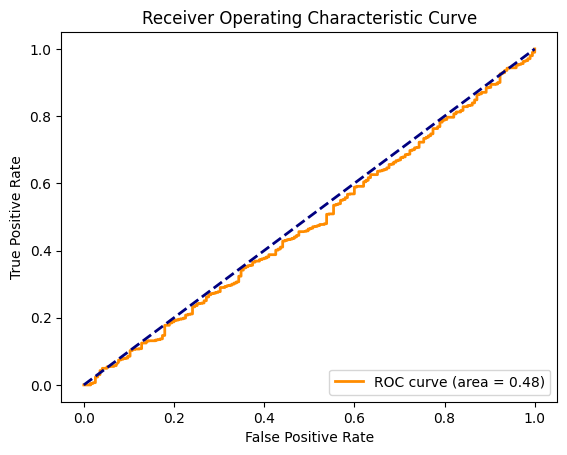

In [ ]:
y_pred_probs = MBmodel.predict(x={'input_ids': X_test_tokens['input_ids'],
                                   'input_mask': X_test_tokens['attention_mask']})
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
MBmodel.save('mbmodel')

**Multilingual and Zero Shot Evaluation of MBert Model using DYNBENCH Data set**

In [ ]:
df1=pd.read_csv('/content/DYNABENCH.csv')

df1['label'] = df1['label'].replace({'hate': 1, 'nothate': 0})
X= df1['text']
y=df1['label']

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

X_tokens =tokenizer(X.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

predicted_lbl = np.where(MBmodel.predict({'input_ids':X_tokens['input_ids'],'input_mask':X_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y, predicted_lbl)
print("Accuracy: ",accuracy)

1286/1286 [==============================] - 295s 229ms/step
Accuracy:  0.5003402683258799


**Multilingual and Zero Shot Evaluation of MBert Model using GHC Data set**

In [ ]:
df3=pd.read_csv('/content/GHC.tsv',sep='\t')
X= df3['Text']
y=df3['Hate']

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

X_tokens =tokenizer(X.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

predicted_lbl = np.where(MBmodel.predict({'input_ids':X_tokens['input_ids'],'input_mask':X_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y, predicted_lbl)
print("Accuracy: ",accuracy)

2705/2705 [==============================] - 614s 227ms/step
Accuracy:  0.8303690092338984


**Multilingual Bert Model Training on MLMA_AR**

In [ ]:
df9=pd.read_csv('/content/MLMA_AR.csv')
df9 = df9[df9['sentiment'].isin(['offensive', 'normal'])]
df9['sentiment'] = df9['sentiment'].replace({'offensive': 1, 'normal': 0})
X= df9['tweet']
y=df9['sentiment']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1, shuffle=True)

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

X_train_tokens =tokenizer(X_train.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)
X_test_tokens =tokenizer(X_test.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

bert = TFBertModel.from_pretrained("bert-base-multilingual-cased")
Length = 100
def get_model():
    input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')
    embeddings = bert([input_ids, input_mask])[1]
    out = Dropout(0.2)(embeddings)
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)
    y = Dense(1,activation = 'sigmoid')(out)
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
    optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, clipnorm=1.0)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model
MBAmodel = get_model()

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
history = MBAmodel.fit(x = {'input_ids':X_train_tokens['input_ids'],
                         'input_mask':X_train_tokens['attention_mask']},
                    y = y_train,
                    epochs=5,
                    validation_split = 0.1,
                    batch_size = 32)

Epoch 1/5
42/42 [==============================] - 85s 875ms/step - loss: 0.7061 - accuracy: 0.5313 - val_loss: 0.6786 - val_accuracy: 0.5800
Epoch 2/5
42/42 [==============================] - 29s 686ms/step - loss: 0.6747 - accuracy: 0.5864 - val_loss: 0.6736 - val_accuracy: 0.5933
Epoch 3/5
42/42 [==============================] - 29s 687ms/step - loss: 0.6439 - accuracy: 0.6267 - val_loss: 0.6511 - val_accuracy: 0.6333
Epoch 4/5
42/42 [==============================] - 29s 701ms/step - loss: 0.5990 - accuracy: 0.6781 - val_loss: 0.6203 - val_accuracy: 0.6733
Epoch 5/5
42/42 [==============================] - 28s 679ms/step - loss: 0.5392 - accuracy: 0.7452 - val_loss: 0.6276 - val_accuracy: 0.6800


In [ ]:
MBAmodel.save('mbamodel')

**Analysis of Results**

In [ ]:
predicted_lbl = np.where(MBAmodel.predict({'input_ids':X_test_tokens['input_ids'],'input_mask':X_test_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y_test, predicted_lbl)
print("Accuracy of MLMA_AR on MBert Model: ",accuracy)

12/12 [==============================] - 6s 216ms/step
Accuracy of MLMA_AR on MBert Model:  0.7024128686327078


In [ ]:
eval_results = MBAmodel.evaluate(x={'input_ids': X_test_tokens['input_ids'],
                                   'input_mask': X_test_tokens['attention_mask']},
                                 y=y_test)
print("Test Loss:", eval_results[0])
print("Test Accuracy:", eval_results[1])

12/12 [==============================] - 3s 224ms/step - loss: 0.6263 - accuracy: 0.7024
Test Loss: 0.6263349056243896
Test Accuracy: 0.7024128437042236


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predicted_lbl)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[117  49]
 [ 62 145]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, predicted_lbl))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       166
           1       0.75      0.70      0.72       207

    accuracy                           0.70       373
   macro avg       0.70      0.70      0.70       373
weighted avg       0.71      0.70      0.70       373



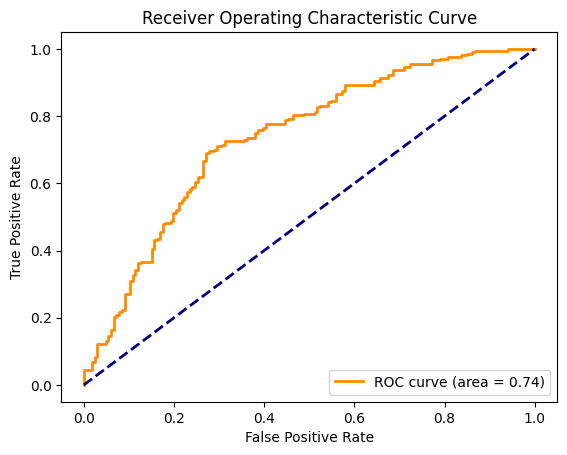

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs = MBAmodel.predict(x={'input_ids': X_test_tokens['input_ids'],
                                   'input_mask': X_test_tokens['attention_mask']})
y_pred = (y_pred_probs > 0.5).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

**Multilingual and Zero Shot Evaluation of MLMA_AR Trained MBert Model using MLMA_FR Data set**

In [ ]:
df8=pd.read_csv('/content/MLMA_FR.csv')
df8 = df8[df8['sentiment'].isin(['offensive', 'normal'])]
df8['sentiment'] = df8['sentiment'].replace({'offensive': 1, 'normal': 0})

X= df8['tweet']
y=df8['sentiment']

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

X_tokens =tokenizer(X.to_list(), add_special_tokens = True, max_length = 100, truncation = True,
          padding = 'max_length', return_tensors = 'tf', return_token_type_ids = False, return_attention_mask = True, verbose = True)

predicted_lbl = np.where(MBAmodel.predict({'input_ids':X_tokens['input_ids'],'input_mask':X_tokens['attention_mask']}) >=0.5,1,0)
accuracy = accuracy_score(y, predicted_lbl)
print("Accuracy: ",accuracy)

68/68 [==============================] - 15s 222ms/step
Accuracy:  0.5966620305980529


**This part is all about the checkpoint-1. We are using this code to test our french dataset by using prompting and using the verbalizer pair(respectful-toxic).**

Instruction Fine-tuned LLM

In [6]:
import pandas as pd
import torch
from datasets import Dataset
from tqdm import tqdm

from transformers import (
    AutoModelForSeq2SeqLM,
    AutoTokenizer,
    DataCollatorWithPadding,
)

class prompting:

        def __init__(self, model="flant5"):
            if model == "flant5":
                self.checkpoint = "google/flan-t5-xl"
            elif model == "mt0":
                self.checkpoint = "bigscience/mt0-xxl"
            else:
                raise Exception("Select one of the following models: flant5 or mt0")

            self.tokenizer = AutoTokenizer.from_pretrained(self.checkpoint)
            self.model = AutoModelForSeq2SeqLM.from_pretrained(self.checkpoint, torch_dtype="auto", device_map="auto")

        def build_prompt(self, prompt_template: str, output_indicator: str, input_text: str):
            if prompt_template:
                prompt = f"{prompt_template} {input_text} {output_indicator}"
            else:
                raise NotImplementedError("Insert a template")
            return prompt

        def predict(self, prompt_template: str, output_indicator: str, data):
            with torch.no_grad():

                if isinstance(data, str):
                    texts = [self.build_prompt(prompt_template, output_indicator, data)]
                elif isinstance(data, pd.DataFrame):
                    texts = data['text'].tolist()
                    texts = [self.build_prompt(prompt_template, output_indicator, t) for t in texts]
                elif isinstance(data, list) and all(isinstance(t, str) for t in data):
                    texts = [self.build_prompt(prompt_template, output_indicator, t) for t in data]
                else:
                    raise ValueError('Input data must be either a string or a pandas DataFrame.')

                raw_dataset = Dataset.from_dict({"text": texts})

                proc_dataset = raw_dataset.map(
                    lambda x: self.tokenizer(
                        x["text"], truncation=True
                    ),  # truncate by default to maximum model length
                    batched=True,
                    load_from_cache_file=False,
                    desc="Running tokenizer on dataset",
                    remove_columns=["text"],
                )

                proc_dataset.set_format("torch")

                loader = torch.utils.data.DataLoader(
                    proc_dataset,
                    shuffle=False,
                    batch_size=512, #default
                    collate_fn=DataCollatorWithPadding(self.tokenizer),
                )

                predictions = []
                for i, batch in tqdm(
                    enumerate(loader), desc=self.checkpoint, total=len(texts) // 512
                ):
                    inputs = {k: v.to(self.model.device) for k, v in batch.items()}
                    outputs = self.model.generate(**inputs)

                    decoded = self.tokenizer.batch_decode(outputs, skip_special_tokens=True)
                    predictions.extend(decoded)

                predictions =  list(map(str.lower, predictions))
            return predictions

Encoder based LLM

In [ ]:
import pandas as pd
#from typing import List
import torch
#from datasets import Dataset
#from tqdm import tqdm
#from encoder_lms import prompting
from openprompt.plms import load_plm
from openprompt.prompts import ManualTemplate
from openprompt.data_utils import InputExample
from openprompt.prompts import ManualVerbalizer
from openprompt import PromptForClassification
from openprompt import PromptDataLoader

class prompting:
        def __init__(self, model="roberta-base"):
            if model == "roberta-base":
                self.checkpoint = ("roberta","roberta-base")
            elif model == "roberta-large":
                self.checkpoint = ("roberta","roberta-large")
            elif model == "bert":
                self.checkpoint = ("bert","bert-base-uncased")
            elif model == "deberta-base":
                self.checkpoint = ("deberta-v3","microsoft/deberta-v3-base")
            elif model == "deberta-large":
                self.checkpoint = ("deberta-v3","microsoft/deberta-v3-large")
            elif model == "xlm-roberta":
                self.checkpoint = ("xlm-roberta-base","xlm-roberta-base")

            else:
                raise Exception("Select one of the following models: roberta-base, roberta-large, bert, deberta-base, deberta-large, xlm")

        def predict(self, template, verb_h, verb_nh, data):
            plm, tokenizer, model_config, WrapperClass = load_plm(self.checkpoint[0], self.checkpoint[1])

            promptTemplate = ManualTemplate(
                 text = f'{{"placeholder":"text_a"}} {template} {{"mask"}}',
                 tokenizer = tokenizer,
                 )

            classes = ["1", "0"]

            label_words = {
                "1": verb_h,
                "0": verb_nh
                }

            print(label_words)


            if isinstance(data, str):
                dataset = [InputExample(guid = 0,
                                        text_a = data)]
            elif isinstance(data, pd.DataFrame):
                dataset = [InputExample(guid = i,
                                        text_a = txt)
                                        for i, txt in enumerate(data["text"])]
            elif isinstance(data, list) and all(isinstance(t, str) for t in data):
                dataset = [InputExample(guid = i,
                                        text_a = txt)
                                        for i, txt in enumerate(data)]
            else:
                raise ValueError('Input data must be either a string or a pandas DataFrame.')


            promptVerbalizer = ManualVerbalizer(
                classes = classes,
                label_words = label_words,
                tokenizer = tokenizer,
            )

            promptModel = PromptForClassification(
                template = promptTemplate,
                plm = plm,
                verbalizer = promptVerbalizer,
            )

            data_loader = PromptDataLoader(
                dataset = dataset,
                tokenizer = tokenizer,
                template = promptTemplate,
                tokenizer_wrapper_class=WrapperClass
            )

            promptModel = promptModel.cuda()

            predictions = []

            promptModel.eval()
            with torch.no_grad():
                for batch in data_loader:
                    batch = batch.cuda()
                    logits = promptModel(batch)
                    preds = torch.argmax(logits, dim = -1)
                    predictions.extend([classes[p] for p in preds.cpu().numpy().tolist()])

            mapper = {"0": "non-hate", "1": "hate"}

            return [mapper[k] for k in predictions]


Calling the prompting class of encoder based LLM

In [9]:
df8=pd.read_csv('/content/MLMA_FR.csv')
prompt_template = "This text is"
verb_h = "toxic"
verb_nh = "respectful"

enc_lms = prompting("roberta-base")
enc_lms.predict(prompt_template, verb_h, verb_nh, [df8['tweet'][1]])

{'1': 'toxic', '0': 'respectful'}


tokenizing: 1it [00:00, 528.18it/s]


['hate']